In [5]:
from astropy.io import fits
import Transmission_calculation as trans
from astropy import units as u
import numpy as np
import math
from astropy.modeling.functional_models import Disk2D
from astropy.modeling.models import Gaussian2D
from astropy.modeling.models import Moffat2D
import matplotlib.pyplot as plt

plt.style.use('bmh')

In [6]:
def numerical_durham(diameter,wavelength,shift,axis_val):
    file=fits.open("PSFs/GLAO_Median_{}nm.fits".format(wavelength))
    durham_data=file['PRIMARY'].data[axis_val]
    scale=file[0].header['scale']
    
    boundary=len(durham_data)

    x = np.arange(0, boundary)
    y = np.arange(0, boundary)
    x, y = np.meshgrid(x, y)

    Disk=Disk2D(1,boundary/2,boundary/2,diameter.value/2/scale)
    Disk_data=Disk(x,y)

    convolved_data=durham_data*Disk_data
    trans=sum(sum(convolved_data))
    
    return trans

def find_d_opt(d_range, SNRs,fraction):
    one_index=list(SNRs).index(1)
    min_index=abs(SNRs[0:one_index+1]-fraction).argmin()
    return d_range[min_index],SNRs[min_index]
    
    


In [7]:
d_range=np.arange(0.01,2.01,0.01)
wavelength_range=[440,562,720,920,1202,1638]

In [8]:
SNR_wavelength_comb=[] #first index is wavelength, second is axis alignment
trans_wavelength_comb=[]
for wavelength in wavelength_range:
    SNR_axis_comb=[]
    trans_axis_comb=[]
    for i in range(0,49):
        SNRs=[]
        trans_vals=[]
        for d in d_range:
            trans_val=numerical_durham(d*u.arcsec,wavelength,0,i)
            trans_vals.append(trans_val)
            SNRs.append(trans_val/d)

        SNR_axis_comb.append(SNRs/max(SNRs))
        trans_axis_comb.append(trans_vals)
    SNR_wavelength_comb.append(SNR_axis_comb)
    trans_wavelength_comb.append(trans_axis_comb)

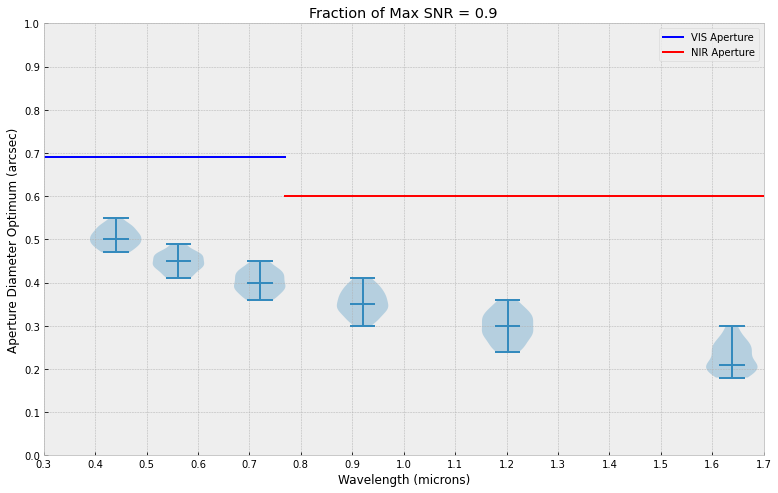

In [9]:
fraction=.9

d_opt_comb=[] #first index is wavelength, second is axis alignment
for SNR_vals in SNR_wavelength_comb:
    d_opt=[]
    for i in range(0,49):
        d_opt_val,void=find_d_opt(d_range,SNR_vals[i],fraction)
        d_opt.append(d_opt_val)
    d_opt_comb.append(d_opt)

fig=plt.figure(figsize=[10,6])
ax=fig.add_axes([0,0,1,1])
plt.axhline(y=0.69,xmin=0,xmax=0.3357,label="VIS Aperture",color='blue')
plt.axhline(y=0.6,xmin=0.3357,xmax=1,label="NIR Aperture",color='red')
bp= ax.violinplot(d_opt_comb,positions=np.array(wavelength_range)/1000,widths=0.1,showmedians=True)
plt.ylim(0,1)
plt.xlim(0.3,1.7)
plt.ylabel("Aperture Diameter Optimum (arcsec)")
plt.xlabel("Wavelength (microns)")

plt.yticks(np.arange(0,1.1,.1))
plt.xticks(np.arange(0.3,1.8,0.1))
plt.legend()
plt.title("Fraction of Max SNR = {}".format(fraction))
plt.savefig("Graphs/Optimum Aperture d SNR = 0.9.png",dpi=600,bbox_inches='tight')      


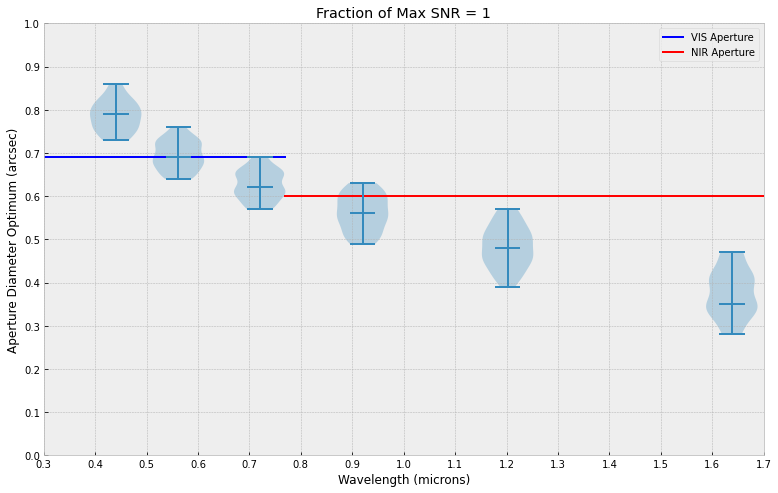

In [10]:
fraction=1

d_opt_comb=[] #first index is wavelength, second is axis alignment
for SNR_vals in SNR_wavelength_comb:
    d_opt=[]
    for i in range(0,49):
        d_opt_val,void=find_d_opt(d_range,SNR_vals[i],fraction)
        d_opt.append(d_opt_val)
    d_opt_comb.append(d_opt)

fig=plt.figure(figsize=[10,6])
ax=fig.add_axes([0,0,1,1])
plt.axhline(y=0.69,xmin=0,xmax=0.3357,label="VIS Aperture",color='blue')
plt.axhline(y=0.6,xmin=0.3357,xmax=1,label="NIR Aperture",color='red')
bp= ax.violinplot(d_opt_comb,positions=np.array(wavelength_range)/1000,widths=0.1,showmedians=True)
plt.ylim(0,1)
plt.xlim(0.3,1.7)
plt.ylabel("Aperture Diameter Optimum (arcsec)")
plt.xlabel("Wavelength (microns)")

plt.yticks(np.arange(0,1.1,.1))
plt.xticks(np.arange(0.3,1.8,0.1))
plt.legend()
plt.title("Fraction of Max SNR = {}".format(fraction))
plt.savefig("Graphs/Optimum Aperture d SNR = 1.png",dpi=600,bbox_inches='tight')   

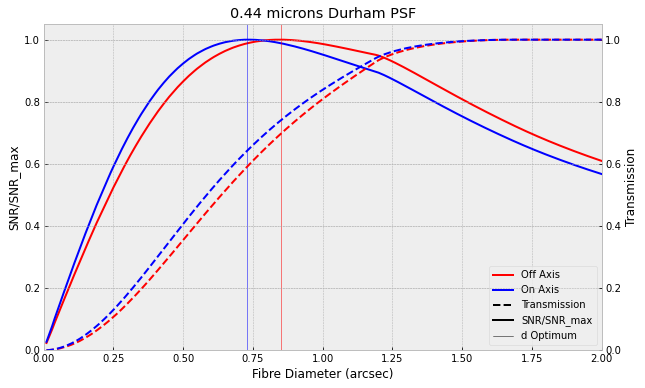

In [11]:
i=0
fig, ax1 = plt.subplots(figsize=[10,6])
ax2=ax1.twinx()

ax1.plot(d_range,SNR_wavelength_comb[i][0],color='red',label="Off Axis")
ax1.plot(d_range,SNR_wavelength_comb[i][25],color='blue',label="On Axis")

ax2.plot(d_range,trans_wavelength_comb[i][0],linestyle='--',color='red')
ax2.plot(d_range,trans_wavelength_comb[i][25],linestyle='--',color='blue')

ax1.axhline(-1,linestyle='--',label="Transmission",color='black')
ax1.axhline(-1,label="SNR/SNR_max",color='black')
ax1.axhline(-1,color='black',linewidth=0.5,label="d Optimum")

ax1.axvline(d_opt_comb[i][0],linewidth=0.5,color='red')
ax1.axvline(d_opt_comb[i][25],linewidth=0.5,color='blue')

ax1.set_xlabel("Fibre Diameter (arcsec)")
ax1.set_ylabel("SNR/SNR_max")
ax2.set_ylabel("Transmission")
ax1.legend(loc=4)

ax1.set_ybound(0,1.05)
ax2.set_ybound(0,1.05)
plt.xlim(0,2)
plt.title("{} microns Durham PSF".format(wavelength_range[i]/1000))
plt.savefig("Graphs/440nm SNR.png",dpi=600)

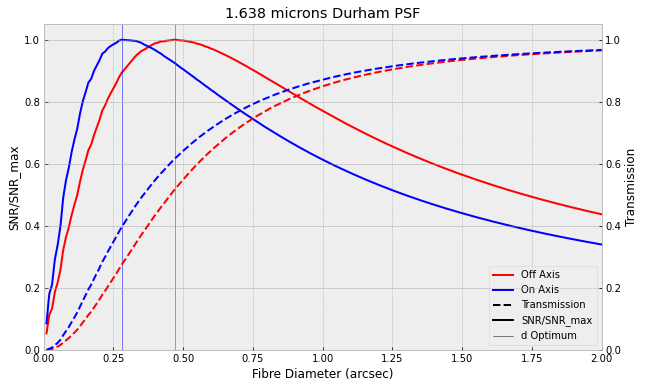

In [12]:
i=-1
fig, ax1 = plt.subplots(figsize=[10,6])
ax2=ax1.twinx()

ax1.plot(d_range,SNR_wavelength_comb[i][0],color='red',label="Off Axis")
ax1.plot(d_range,SNR_wavelength_comb[i][25],color='blue',label="On Axis")

ax2.plot(d_range,trans_wavelength_comb[i][0],linestyle='--',color='red')
ax2.plot(d_range,trans_wavelength_comb[i][25],linestyle='--',color='blue')

ax1.axhline(-1,linestyle='--',label="Transmission",color='black')
ax1.axhline(-1,label="SNR/SNR_max",color='black')
ax1.axhline(-1,color='black',linewidth=0.5,label="d Optimum")

ax1.axvline(d_opt_comb[i][0],linewidth=0.5,color='red')
ax1.axvline(d_opt_comb[i][25],linewidth=0.5,color='blue')

ax1.set_xlabel("Fibre Diameter (arcsec)")
ax1.set_ylabel("SNR/SNR_max")
ax2.set_ylabel("Transmission")
ax1.legend(loc=4)

ax1.set_ybound(0,1.05)
ax2.set_ybound(0,1.05)
plt.xlim(0,2)
plt.title("{} microns Durham PSF".format(wavelength_range[i]/1000))
plt.savefig("Graphs/1638nm SNR.png",dpi=600)
